# 🚀 **Proyecto: Análisis de Alura Store para el Sr. Juan**

* **Obejtivo**: Analizar los datos de ventas, rendimiento y reseñas de las 4 tiendas de Alura Store para identificar a la "menos eficiente" y recomendar cuál debe ser vendida.

## **1. Importación y Carga de datos**



Primero, importamos las bibliotecas esenciales que usaremos en todo el análisis: pandas para la manipulación de datos y matplotlib para la visualización.

In [313]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.00,6900.00,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,192300.00,8400.00,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,209600.00,15900.00,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,757500.00,41000.00,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,335200.00,20200.00,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


## **2. Unificar los datos**

Los datos están separados en 4 archivos distintos, uno por cada tienda. Los cargaremos y luego los unificaremos en un solo df_master. Antes de unirlos creamos una columna Tienda en cada DataFrame para unificarlos

In [316]:
# Añadir la columna "Tienda" a cada DataFrame
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

In [317]:
# Creamos una lista con nuestros 4 DataFrame listos
lista_tiendas = [tienda, tienda2, tienda3,tienda4]

In [318]:
# concatenamos nuestros dataframes en uno solo
df_master = pd.concat(lista_tiendas,ignore_index=True)
df_master

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.00,6900.00,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08,Tienda 1
1,Mesa de comedor,Muebles,192300.00,8400.00,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56,Tienda 1
2,Juego de mesa,Juguetes,209600.00,15900.00,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51,Tienda 1
3,Microondas,Electrodomésticos,757500.00,41000.00,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52,Tienda 1
4,Silla de oficina,Muebles,335200.00,20200.00,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56,Tienda 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de comedor,Muebles,227700.00,12600.00,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25,-75.56,Tienda 4
9431,Silla de oficina,Muebles,342000.00,18600.00,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.13,-73.12,Tienda 4
9432,Vaso térmico,Deportes y diversión,36700.00,2400.00,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.61,-74.08,Tienda 4
9433,Set de ollas,Artículos para el hogar,151800.00,8300.00,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.44,-76.52,Tienda 4


## **3. Validación y Limpieza de Datos**



*   Revisamos si existen valores nulos
*   Verificamos los tipos de datos de nuestras columnas



In [319]:
df_master.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.00,6900.00,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08,Tienda 1
1,Mesa de comedor,Muebles,192300.00,8400.00,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56,Tienda 1
2,Juego de mesa,Juguetes,209600.00,15900.00,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51,Tienda 1
3,Microondas,Electrodomésticos,757500.00,41000.00,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52,Tienda 1
4,Silla de oficina,Muebles,335200.00,20200.00,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56,Tienda 1


In [320]:
df_master.tail()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
9430,Mesa de comedor,Muebles,227700.00,12600.00,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25,-75.56,Tienda 4
9431,Silla de oficina,Muebles,342000.00,18600.00,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.13,-73.12,Tienda 4
9432,Vaso térmico,Deportes y diversión,36700.00,2400.00,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.61,-74.08,Tienda 4
9433,Set de ollas,Artículos para el hogar,151800.00,8300.00,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.44,-76.52,Tienda 4
9434,Cuerda para saltar,Deportes y diversión,11200.00,1300.00,17/11/2021,Felipe Santos,Bogotá,5,Tarjeta de crédito,1,4.61,-74.08,Tienda 4


In [321]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Tienda                  9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


El dataset no presenta ningun valor nulo

In [314]:
# información de nuestro data set
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


Los tipos de datos son correctos

## **4. Análisis Exploratorio**

### **4.1 KPIs por Tienda**


In [322]:
# Agrupar por Tiendas para aplicar varias agregaciones
resumen_tiendas = df_master.groupby('Tienda').agg(
                                                    Ingresos_totales=('Precio','sum'),
                                                    Ventas_totales=('Producto','count'),
                                                    Calificacion_promedio=('Calificación','mean'),
                                                    Costo_envio_promedio=('Costo de envío','mean'))

Calculamos las principales métricas que nos piden y agrupamos por Tienda:
* Ingresos Totales
* Ventas Totales
* Calificación Promedio
* Costo de Envío Promedio

In [323]:
resumen_tiendas = resumen_tiendas.sort_values(by='Ingresos_totales', ascending=True)
resumen_tiendas

,Ingresos_totales,Ventas_totales,Calificacion_promedio,Costo_envio_promedio
Tienda,,,,
Tienda 4,1038375700.00,2358,4.00,23459.46
Tienda 3,1098019600.00,2359,4.05,24805.68
Tienda 2,1116343500.00,2359,4.04,25216.24
Tienda 1,1150880400.00,2359,3.98,26018.61


### **4.2 Visualización de KPIs**

#### **4.2.1 Ingresos Totales por Tienda**

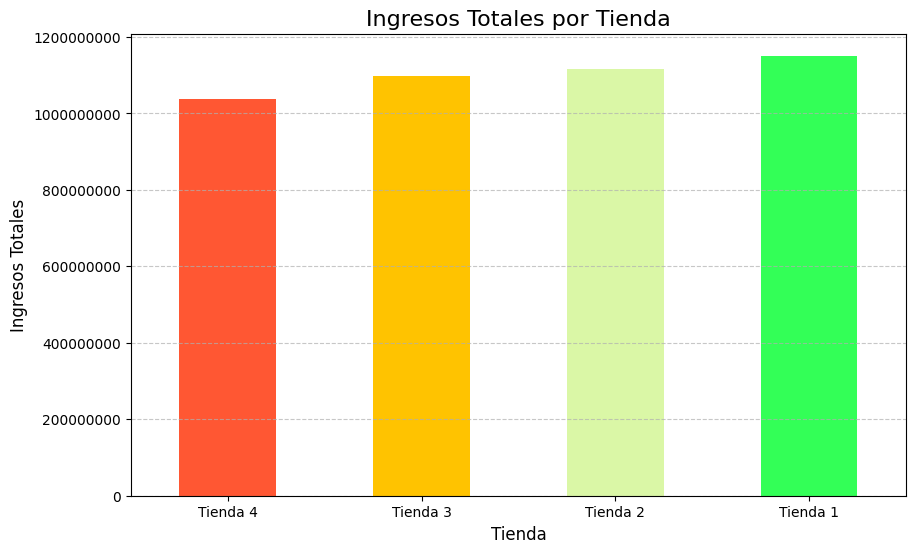

In [324]:
plt.figure(figsize=(10,6))

resumen_tiendas['Ingresos_totales'].plot(
                                          kind='bar',
                                          color=['#FF5733', '#FFC300', '#DAF7A6', '#33FF57'])

plt.title('Ingresos Totales por Tienda', fontsize=16)
plt.ylabel('Ingresos Totales', fontsize=12)
plt.xlabel('Tienda', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y',linestyle='--',alpha=0.7)

plt.ticklabel_format(style='plain',axis='y')

plt.show()

#### **4.2.2 Calificación Promedio Por Tienda**

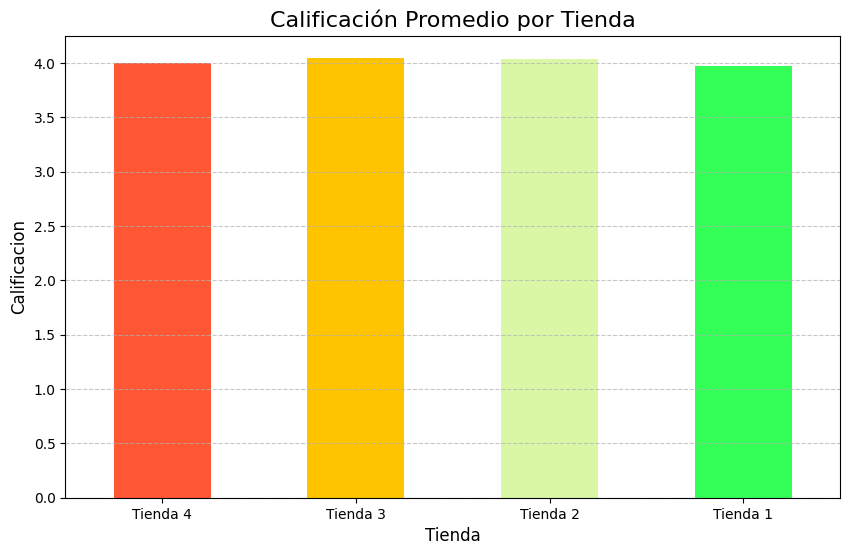

In [325]:
plt.figure(figsize=(10,6))

resumen_tiendas['Calificacion_promedio'].plot(
                                          kind='bar',
                                          color=['#FF5733', '#FFC300', '#DAF7A6', '#33FF57'])

plt.title('Calificación Promedio por Tienda', fontsize=16)
plt.ylabel('Calificacion', fontsize=12)
plt.xlabel('Tienda', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y',linestyle='--',alpha=0.7)

plt.ticklabel_format(style='plain',axis='y')

plt.show()

#### **Hallazgos hasta el momento**

* El Gráfico 1 confirma que la Tienda 4 es la que menos ingresos genera.

* La tabla resumen_tiendas nos mostró que todas las tiendas venden casi la misma cantidad de productos (aprox. 2359).

* El Gráfico 2 muestra que las calificaciones son casi idénticas (todas rondan 4.0).

¿Por qué la Tienda 4 gana menos si vende la misma cantidad de productos? **Hipótesis**: La Tienda 4 debe estar vendiendo productos de menor precio.

### **4.3 Análisis Profundo**

**¿Qué venden las tiendas?**

#### **4.3.1 Análisis por Categoría**

In [377]:
# Agrupamos por Tienda y Categoria, contamos cuantas ventas hay en cada grupo
ventas_por_categoria = df_master.groupby(['Tienda', 'Categoría del Producto']).size()

In [378]:
# debemos convertir a DataFrame la variable anterior para visualizarla mejor
ventas_por_categoria = ventas_por_categoria.reset_index(name='Numero_Ventas')

In [379]:
# ordenamos para ver que categoría vende mas cada tienda
# Tienda se ordena de A-Z, Numero_ventas de ordena de mayor a menor
ventas_por_categoria = ventas_por_categoria.sort_values(by=['Tienda', 'Numero_Ventas'], ascending=[True,False])
ventas_por_categoria

,Tienda,Categoría del Producto,Numero_Ventas
7,Tienda 1,Muebles,465
3,Tienda 1,Electrónicos,448
5,Tienda 1,Juguetes,324
2,Tienda 1,Electrodomésticos,312
1,Tienda 1,Deportes y diversión,284
4,Tienda 1,Instrumentos musicales,182
6,Tienda 1,Libros,173
0,Tienda 1,Artículos para el hogar,171
15,Tienda 2,Muebles,442
11,Tienda 2,Electrónicos,422


In [380]:
# Imprimimos las 5 categorias principales de cada tienda
print("--- Top 5 Categorías por Tienda ---")
print(ventas_por_categoria.groupby('Tienda').head(5))

--- Top 5 Categorías por Tienda ---
      Tienda Categoría del Producto  Numero_Ventas
7   Tienda 1                Muebles            465
3   Tienda 1           Electrónicos            448
5   Tienda 1               Juguetes            324
2   Tienda 1      Electrodomésticos            312
1   Tienda 1   Deportes y diversión            284
15  Tienda 2                Muebles            442
11  Tienda 2           Electrónicos            422
13  Tienda 2               Juguetes            313
10  Tienda 2      Electrodomésticos            305
9   Tienda 2   Deportes y diversión            275
23  Tienda 3                Muebles            499
19  Tienda 3           Electrónicos            451
21  Tienda 3               Juguetes            315
18  Tienda 3      Electrodomésticos            278
17  Tienda 3   Deportes y diversión            277
31  Tienda 4                Muebles            480
27  Tienda 4           Electrónicos            451
29  Tienda 4               Juguetes           

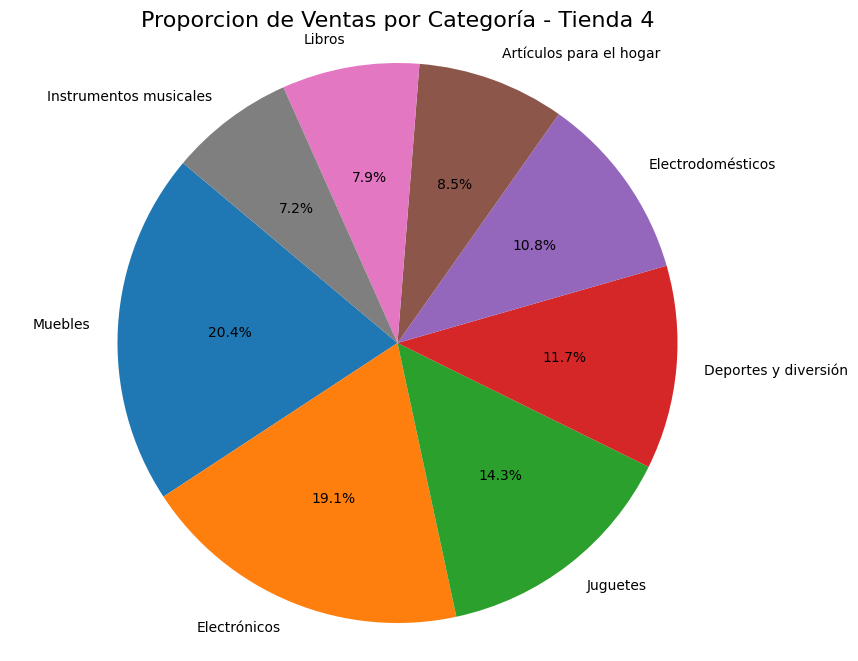

In [381]:
# Gráfico de pastel para conocer acerca de la proporción de la Tienda 4
categorias_tienda_4 = ventas_por_categoria[ventas_por_categoria['Tienda'] =='Tienda 4']

plt.figure(figsize=(10,8))

plt.pie(
    categorias_tienda_4['Numero_Ventas'],
    labels=categorias_tienda_4['Categoría del Producto'],
    autopct='%1.1f%%',
    startangle=140
)

plt.title('Proporcion de Ventas por Categoría - Tienda 4', fontsize=16)
plt.axis('equal')
plt.show()

##### **Hallazgos hasta el momento**

* El análisis de "Top 5 Categorías" muestra que todas las tiendas venden exactamente las mismas categorías principales.

* **Hipótesis actualizada**: Si venden las mismas categorías, la diferencia debe estar en los productos específicos dentro de esas categorías. La Tienda 4 debe vender productos de menor valor (ej. "Cubertería") mientras otras venden productos de mayor valor (ej. "TV 4K").

**Hipótesis**: La Tienda 4 debe estar vendiendo productos de menor precio.

#### **4.3.2 Análisis por Producto**

In [367]:
#Agrupar por Tienda y Producto, contamos cuantas veces se vendió
ventas_por_producto = df_master.groupby(['Tienda','Producto']).size()

In [368]:
#Debemos convertir nuestra nueva variable en un Dataframe
ventas_por_producto = ventas_por_producto.reset_index(name='Numero_Ventas')

In [369]:
# Podemos conocer la cantidad de productos vendidos por categoria en cada tienda
df_master.groupby(['Tienda','Categoría del Producto']).size()

Tienda    Categoría del Producto 
Tienda 1  Artículos para el hogar    171
          Deportes y diversión       284
          Electrodomésticos          312
          Electrónicos               448
          Instrumentos musicales     182
          Juguetes                   324
          Libros                     173
          Muebles                    465
Tienda 2  Artículos para el hogar    181
          Deportes y diversión       275
          Electrodomésticos          305
          Electrónicos               422
          Instrumentos musicales     224
          Juguetes                   313
          Libros                     197
          Muebles                    442
Tienda 3  Artículos para el hogar    177
          Deportes y diversión       277
          Electrodomésticos          278
          Electrónicos               451
          Instrumentos musicales     177
          Juguetes                   315
          Libros                     185
          Muebles                    499
Tienda 4  Artículos para el hogar    201
          Deportes y diversión       277
          Electrodomésticos          254
          Electrónicos               451
          Instrumentos musicales     170
          Juguetes                   338
          Libros                     187
          Muebles                    480
dtype: int64

In [370]:
# Productos mas vendidos y menos vendidos por tienda
df_master.groupby(['Tienda','Producto']).size()

Tienda    Producto                 
Tienda 1  Ajedrez de madera            49
          Armario                      60
          Asistente virtual            40
          Auriculares                  50
          Auriculares con micrófono    33
                                       ..
Tienda 4  Smartwatch                   39
          Sofá reclinable              47
          TV LED UHD 4K                40
          Tablet ABXY                  45
          Vaso térmico                 48
Length: 204, dtype: int64

In [371]:
#Ordenamos nuestro dataframe para ver unicamente el top de ventas de cada tienda y lo asignamos al mismo DataFrame
ventas_por_producto_top = ventas_por_producto.sort_values(
                                                            by=['Tienda','Numero_Ventas'],
                                                            ascending=[True, False]
                                                            )

In [372]:
print("--- PRODUCTOS MÁS VENDIDOS (TOP 5 POR TIENDA) ---")
print(ventas_por_producto_top.groupby('Tienda').head(5))

--- PRODUCTOS MÁS VENDIDOS (TOP 5 POR TIENDA) ---
       Tienda                   Producto  Numero_Ventas
1    Tienda 1                    Armario             60
33   Tienda 1                 Microondas             60
48   Tienda 1              TV LED UHD 4K             60
40   Tienda 1           Secadora de ropa             58
9    Tienda 1    Bloques de construcción             56
75   Tienda 2  Iniciando en programación             65
84   Tienda 2                 Microondas             62
58   Tienda 2                    Batería             61
72   Tienda 2          Guitarra acústica             58
89   Tienda 2                  Pandereta             58
129  Tienda 3              Kit de bancas             57
113  Tienda 3                  Cama king             56
133  Tienda 3            Mesa de comedor             56
134  Tienda 3              Mesa de noche             55
143  Tienda 3               Set de ollas             55
163  Tienda 4                   Cama box             6

In [373]:
#Ordenamos nuestro dataframe para ver unicamente el bottom de ventas de cada tienda y lo asignamos al mismo dataframe
ventas_por_producto_bottom = ventas_por_producto.sort_values(
                                                            by=['Tienda','Numero_Ventas'],
                                                            ascending=[True, True]
                                                            )

In [374]:
print("\n--- PRODUCTOS MENOS VENDIDOS (BOTTOM 5 POR TIENDA) ---")
print(ventas_por_producto_bottom.groupby('Tienda').head(5))


--- PRODUCTOS MENOS VENDIDOS (BOTTOM 5 POR TIENDA) ---
       Tienda                     Producto  Numero_Ventas
4    Tienda 1    Auriculares con micrófono             33
13   Tienda 1                 Celular ABXY             33
37   Tienda 1              Olla de presión             35
38   Tienda 1                    Pandereta             36
14   Tienda 1  Ciencia de datos con Python             39
77   Tienda 2                Juego de mesa             32
74   Tienda 2                    Impresora             34
82   Tienda 2              Mesa de comedor             34
95   Tienda 2                       Sillón             35
54   Tienda 2                  Auriculares             37
111  Tienda 3      Bloques de construcción             35
135  Tienda 3                   Microondas             36
136  Tienda 3                      Mochila             36
144  Tienda 3                 Set de vasos             36
124  Tienda 3           Guitarra eléctrica             38
175  Tienda 4   

##### **Hallazgos hasta el momento**

Al comparar el Top 5 de la Tienda 1 (altos ingresos) vs la Tienda 4 (bajos ingresos):

* Tienda 1: Vende "TV LED UHD 4K", "Secadora de ropa", "Armario".

* Tienda 4: Vende "Cubertería", "Dashboards con Power BI", "Carrito de control remoto".

Queda confirmado que la Tienda 4 es la menos rentable porque, aunque vende la misma cantidad de ítems, su mix de productos está enfocado en artículos de bajo precio.

### **4.4 Análisis Geografico**

* Exploramos dónde ocurren las ventas para ver si hay patrones regionales que expliquen el rendimiento.

#### **4.4.1 Rendimiento de Ingresos por Ciudad**

Usamos un groupby doble y unstack() para pivotar los datos, creando un gráfico de barras agrupado para la comparación.

In [386]:
# ¿Que tienda tiene mejor rendimiento por region/ciudad?
ingresos_por_ciudad = df_master.groupby(['Lugar de Compra','Tienda'])['Precio'].sum()

df_ingresos_ciudad = ingresos_por_ciudad.unstack().fillna(0)

print("----Ingresos por Tienda y Ciudad----")
print(df_ingresos_ciudad)

----Ingresos por Tienda y Ciudad----
Tienda              Tienda 1     Tienda 2     Tienda 3     Tienda 4
Lugar de Compra                                                    
Armenia           4615700.00   3363200.00   3980300.00    283700.00
Barranquilla     32907700.00  27741300.00  36768500.00  34623000.00
Bogotá          440005000.00 479959200.00 475562100.00 419332000.00
Bucaramanga      17579200.00  23895600.00  23538900.00  25559600.00
Cali            154493700.00 118257600.00 109287600.00 124487200.00
Cartagena        22296700.00  21548300.00  34144100.00  24387600.00
Cúcuta           37879500.00  28991500.00  25165500.00   7332600.00
Inírida           2722500.00   2504600.00   1333700.00   1527100.00
Leticia          14669800.00  16159000.00  19212800.00  17108300.00
Manizales         8027600.00   3539900.00   6501800.00   1298600.00
Medellín        296858100.00 297246700.00 250580600.00 251983800.00
Neiva             3494000.00   3839400.00   4359500.00   9205100.00
Pasto      

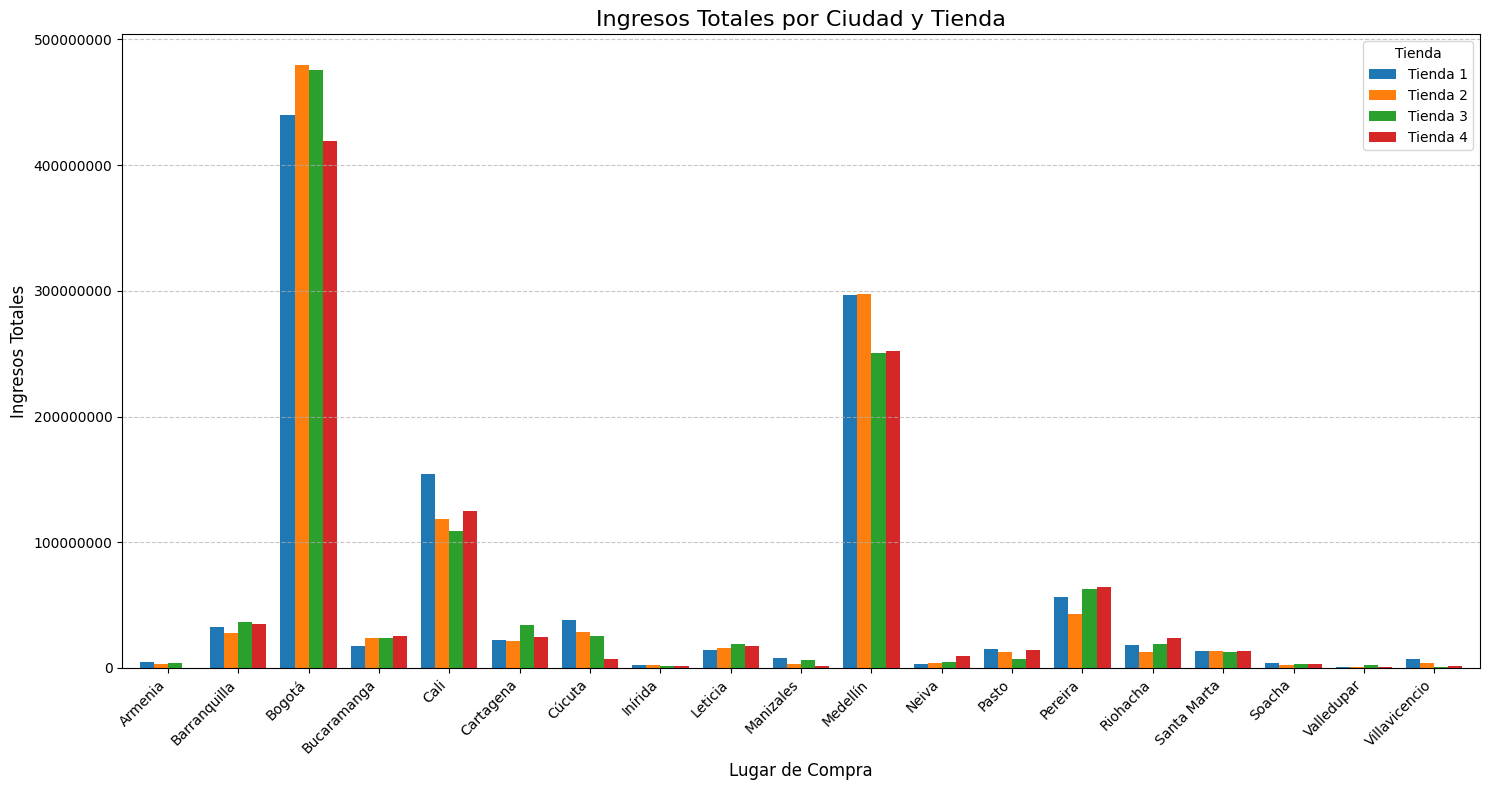

In [387]:
df_ingresos_ciudad.plot(kind='bar',figsize=(15,8),width=0.8)

plt.title('Ingresos Totales por Ciudad y Tienda', fontsize=16)
plt.ylabel('Ingresos Totales', fontsize=12)
plt.xlabel('Lugar de Compra', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotamos las etiquetas de las ciudades
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta el gráfico para que quepa todo
plt.show()

#### **4.4.2 Mapa de Calor de Calificaciones de Clientes**

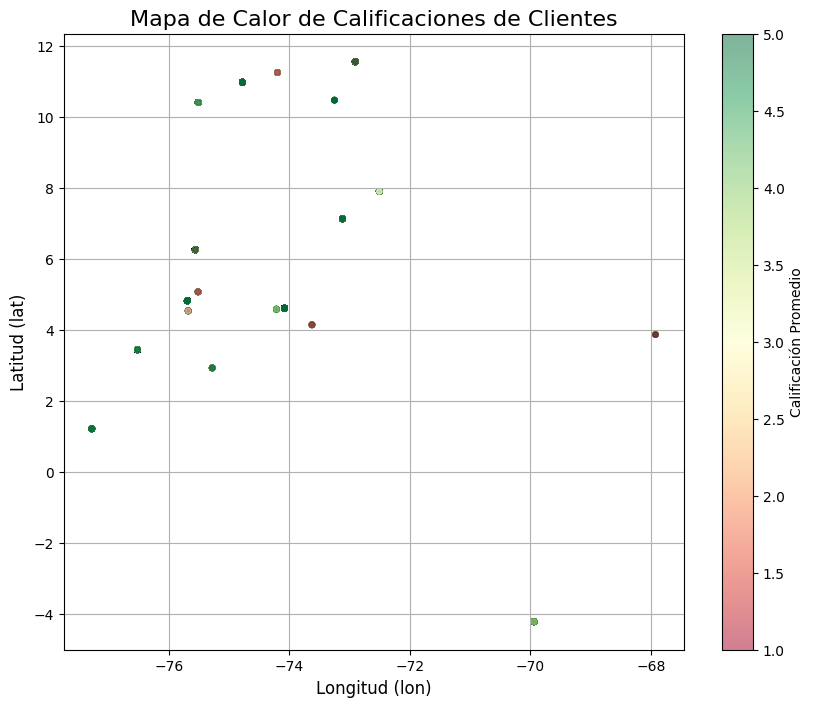

In [388]:
# Mapa de calor - ¿Influye la geografia en las calificaciones?
plt.figure(figsize=(10, 8))


scatter_plot = plt.scatter(
    x=df_master['lon'],
    y=df_master['lat'],
    c=df_master['Calificación'],
    cmap='RdYlGn',
    alpha=0.5,
    s=15
)


plt.colorbar(scatter_plot, label='Calificación Promedio')

plt.title('Mapa de Calor de Calificaciones de Clientes', fontsize=16)
plt.xlabel('Longitud (lon)', fontsize=12)
plt.ylabel('Latitud (lat)', fontsize=12)
plt.grid(True)
plt.show()

#### **Hallazgos**

* El gráfico de barras agrupado muestra que la Tienda 4 (roja) tiene un rendimiento inferior en los dos mercados más grandes: Bogotá y Medellín.

* El mapa de calor de calificaciones es predominantemente verde (calificaciones 4-5), lo que indica que no hay "zonas rojas" de clientes insatisfechos.


Esto refuerza la conclusión: el problema de la Tienda 4 es financiero, no operacional o geográfico.

# 📄 **Informe Final**

## ***Introducción***

**A: Sr. Juan Asunto: Análisis de Rendimiento y Recomendación de Venta de Tienda Alura Store**

El presente informe tiene como objetivo analizar el rendimiento de las cuatro tiendas de la cadena Alura Store a partir de los datos de ventas, productos, costos y reseñas de clientes. El propósito final es identificar de manera objetiva cuál de las cuatro tiendas es la menos eficiente y, por lo tanto, la candidata recomendada para ser vendida.

El análisis se basa en un conjunto de 9,435 registros de ventas consolidados de las cuatro tiendas, asegurando una comparación equitativa.

## ***Desarrollo y Hallazgos del Análisis***

Para determinar la tienda menos eficiente, se evaluaron 5 métricas clave, respaldadas por las visualizaciones generadas en este notebook.

### **1. Ingresos Totales y Volumenes de Ventas**

El primer indicador es la rentabilidad. El análisis de Ingresos Totales (Gráfico 1: Ingresos Totales por Tienda) muestra una clara jerarquía:

* Tienda 1: $1,150,880,400 (La más rentable)

* Tienda 2: $1,116,343,500

* Tienda 3: $1,098,019,600

* Tienda 4: $1,038,375,700 (La menos rentable)

Sin embargo, un hallazgo crucial de la tabla resumen_tiendas es que el volumen de ventas es casi idéntico para todas (aprox. 2359 ventas cada una). Esto significa que la Tienda 4 no es la que menos vende, sino la que menos ingresa por venta.

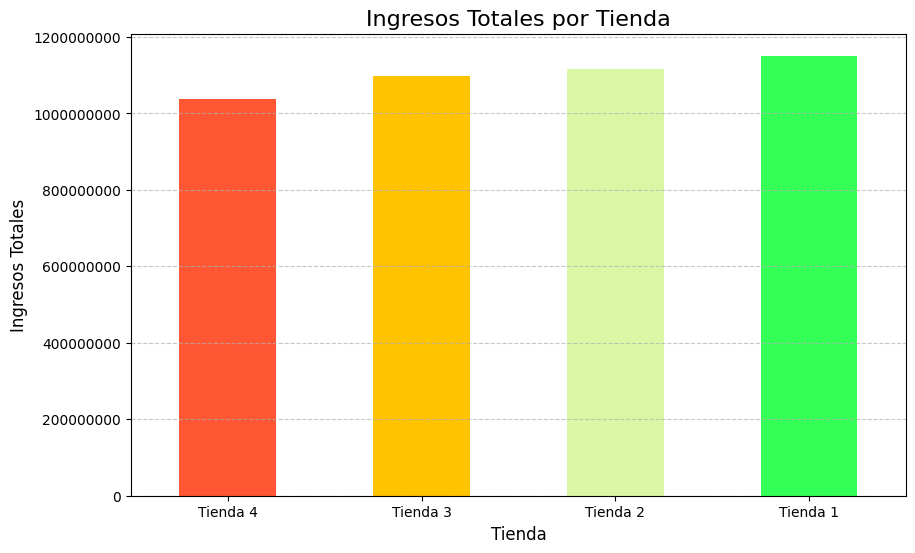

### **2. Calificaciones de Clientes y Costos de Envío**

Se analizó la eficiencia operativa y la satisfacción del cliente.

* Calificaciones Promedio: Todas las tiendas gozan de una excelente reputación, con calificaciones casi idénticas (Gráfico 2: Calificación Promedio por Tienda). La Tienda 1 tiene la más baja (3.98) y la Tienda 3 la más alta (4.05), pero la diferencia es estadísticamente insignificante.

* Costo de Envío Promedio: Aquí la Tienda 4 destaca positivamente, teniendo el costo de envío promedio más bajo ($23,459) mientras que la Tienda 1 tiene el más alto (26,018)

**Hallazgo Clave**: La Tienda 4 es operacionalmente eficiente (envíos baratos, buenas reseñas), pero financieramente deficiente.


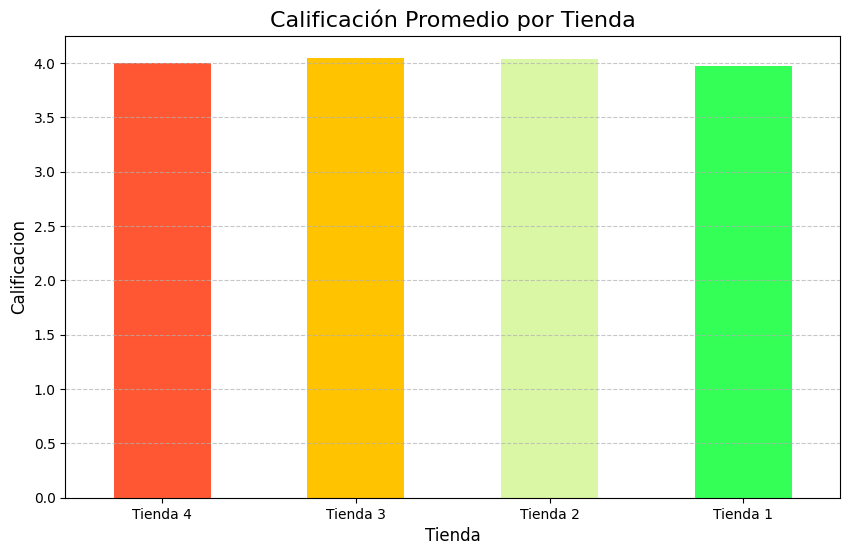

### **3. Análisis de Categorías y Productos**

Para entender la discrepancia financiera, se analizó qué vende cada tienda.

* **Categorías Más Vendidas:** El análisis (Tabla Top 5 Categorías y Gráfico 3 Pie Chart Tienda 4) reveló que todas las tiendas venden las mismas categorías principales ("Muebles" y "Electrónicos" dominan en todas).

* **Productos Más y Menos Vendidos:** Aquí yace la respuesta. Al comparar los productos específicos más vendidos (Tabla PRODUCTOS MÁS VENDIDOS), vemos que:

* La Tienda 1 (altos ingresos) vende productos de alto valor como "TV LED UHD 4K" y "Secadora de ropa".

* La Tienda 4 (bajos ingresos) concentra sus ventas en productos de mucho menor valor, como "Cubertería" y "Dashboards con Power BI".

Esto confirma que la Tienda 4 tiene un "Ticket Promedio" mucho más bajo que sus pares.

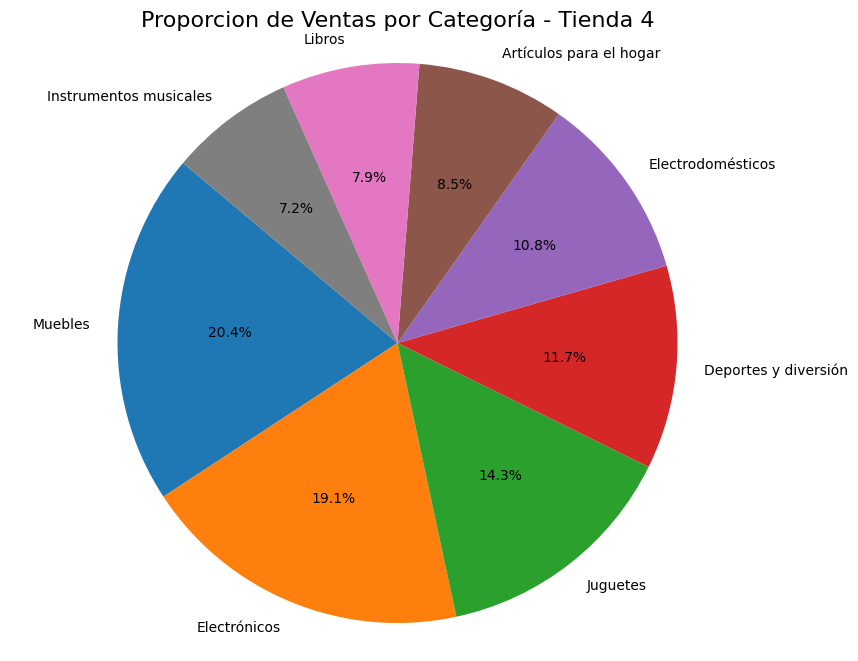

### **4. Análisis Geográfico**

Finalmente, el análisis de rendimiento por ciudad (Gráfico Ingresos Totales por Ciudad y Tienda) confirma la tendencia. En los dos mercados más importantes, Bogotá y Medellín, la Tienda 4 es la que menos ingresos genera de las cuatro.

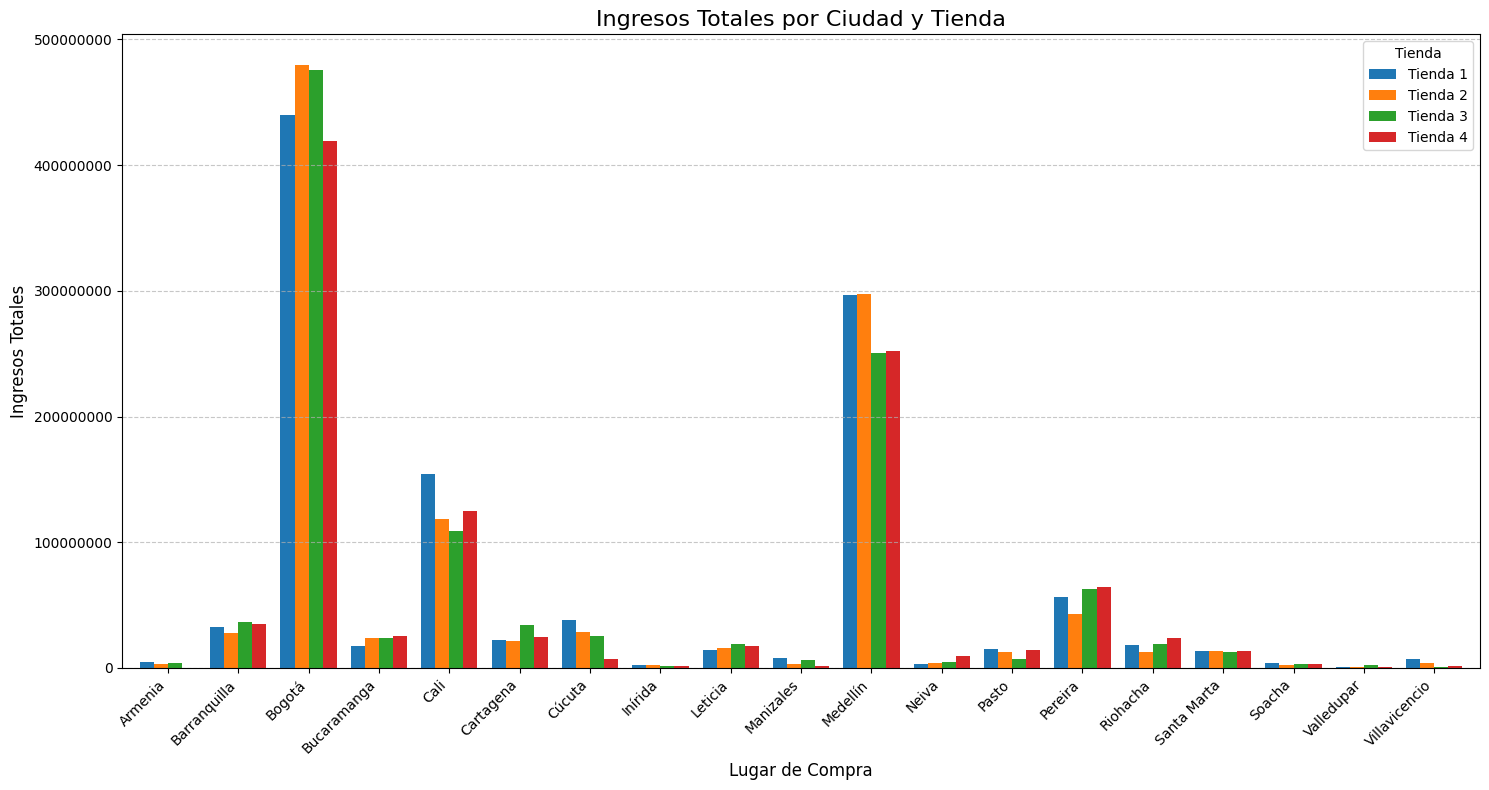

## ***Conclusión y Recomendación Final***

Basado en la evidencia presentada:

**Se recomienda vender la Tienda 4.**

La Tienda 4 es la menos eficiente desde el punto de vista financiero. Aunque mantiene un volumen de ventas saludable y una operación logística eficiente (bajos costos de envío y buenas reseñas), su rentabilidad es la más baja del grupo.

Este bajo rendimiento no se debe a una mala gestión o falta de clientes, sino a un mix de productos enfocado en artículos de bajo precio. Mientras que la Tienda 1 genera altos ingresos a pesar de sus mayores costos de envío, la Tienda 4 no logra capitalizar su volumen de ventas.

Vender la Tienda 4 representa la decisión con el menor impacto negativo en la facturación total de Alura Store y libera capital de la unidad de negocio que genera menos valor por transacción.